In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [8]:
reviews = pd.read_csv("reviews.csv")
neighbourhoods = pd.read_csv("neighbourhoods.csv")
listings = pd.read_csv("listings.csv")

#the details information
reviews_d = pd.read_csv("Detailed_info/reviews.csv")
calendar = pd.read_csv("Detailed_info/calendar.csv")
listings_d = pd.read_csv("Detailed_info/listings.csv")

In [9]:
#okay let's see how many columns and what the columns

print(listings_d.shape)
print(listings_d.columns)
print("---------------------------------------\n")
print(calendar.shape)
print(calendar.columns)
print("---------------------------------------\n")
print(listings_d.shape)
print(listings_d.columns)

(407, 75)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg

In [10]:
#okay we wanna work with the listing file we wanna see it in more detail way
pd.set_option('display.max_columns', None)
listings_d.head(1) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100%,89%,f,https://a0.muscache.com/im/users/5294164/profi...,https://a0.muscache.com/im/users/5294164/profi...,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,42.66719,-73.8158,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",$50.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91


In [11]:
print(listings_d["source"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_has_profile_pic"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_identity_verified"].value_counts())
print("----------------------------------------\n")
print(listings_d["neighbourhood_cleansed"].value_counts(ascending=False))
print("----------------------------------------\n")
print(listings_d["neighbourhood_group_cleansed"].value_counts())
print("----------------------------------------\n")
print(listings_d["property_type"].value_counts())
print("----------------------------------------\n")
print(listings_d["room_type"].value_counts())
print("----------------------------------------\n")
print(listings_d["bathrooms"].value_counts())
#okay that's weird there are 1.5, 3, 3.5, and 7
#they are weird numbers I wanna know what  kind of unit has this baths or I can check on the website
#let's get the row

print("----------------------------------------\n")
print(listings_d["bathrooms_text"].value_counts())
print("----------------------------------------\n")
print(listings_d["beds"].value_counts())
print("----------------------------------------\n")
print(listings_d["calendar_updated"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())

# review_scores_accuracy: that speaks about how accurate the description is with the reality

source
city scrape        369
previous scrape     38
Name: count, dtype: int64
----------------------------------------

host_is_superhost
f    217
t    185
Name: count, dtype: int64
----------------------------------------

host_has_profile_pic
t    399
f      8
Name: count, dtype: int64
----------------------------------------

host_identity_verified
t    364
f     43
Name: count, dtype: int64
----------------------------------------

neighbourhood_cleansed
SIXTH WARD         86
SECOND WARD        51
TENTH WARD         37
FOURTEENTH WARD    35
THIRD WARD         35
NINTH WARD         32
THIRTEENTH WARD    31
ELEVENTH WARD      19
SEVENTH WARD       18
FIFTEENTH WARD     17
FOURTH WARD        14
EIGHTH WARD         9
FIRST WARD          9
FIFTH WARD          8
TWELFTH WARD        6
Name: count, dtype: int64
----------------------------------------

Series([], Name: count, dtype: int64)
----------------------------------------

property_type
Entire rental unit                   191
Pri

In [24]:
#listings_d[listings_d["bathrooms"] == .5] # I think half means shared bathroom ;)
#listings_d[listings_d["bathrooms"] == 7] # okay here is a special bathroom and another shared places
#listings_d[listings_d["bathrooms"] == 0] #here room shared everything shared no bathroom
#listings_d[listings_d["bathrooms"] == 5.5]# In the pictures of the place there's a bathroom but this place not for staying 
#listings_d[listings_d["bathrooms"] == 2.5]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
369,1010759793485911351,https://www.airbnb.com/rooms/1010759793485911351,20240214034713,2024-02-14,city scrape,Cozy room walkable to eateries,"In the heart of Albany, our expansive home off...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,382970529,https://www.airbnb.com/users/show/382970529,Thomas,2021-01-04,"Albany, NY",I have the great honor of being able to invite...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Melrose,10,15,['phone'],t,t,NaN,THIRTEENTH WARD,NaN,42.670028,-73.797705,Private room in home,Private room,1,3.0,3 baths,1.0,1.0,"[""Fire extinguisher"", ""Security cameras on pro...",$55.00,2,365,2,2,1125,1125,2.0,1125.0,NaN,t,25,55,82,261,2024-02-14,13,13,1,2023-11-03,2024-01-22,4.77,4.77,4.77,4.69,4.62,4.85,4.62,NaN,f,10,1,9,0,3.75
370,1010759799610182054,https://www.airbnb.com/rooms/1010759799610182054,20240214034713,2024-02-14,city scrape,Cozy Room in Spacious Manor,Our home is a sanctuary of space and elegance....,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,382970529,https://www.airbnb.com/users/show/382970529,Thomas,2021-01-04,"Albany, NY",I have the great honor of being able to invite...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Melrose,10,15,['phone'],t,t,NaN,THIRTEENTH WARD,NaN,42.669710,-73.797550,Private room in home,Private room,1,3.0,3 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Body soap"", ""Bread make...",$55.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,28,55,82,261,2024-02-14,12,12,0,2023-11-05,2023-12-30,5.00,4.83,5.00,4.92,5.00,4.92,5.00,NaN,f,10,1,9,0,3.53
371,1013659440189111738,https://www.airbnb.com/rooms/1013659440189111738,20240214034713,2024-02-14,city scrape,Cozy Room Walkable to Eateries and Theatre,Experience the comfort of staying in a second ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,382970529,https://www.airbnb.com/users/show/382970529,Thomas,2021-01-04,"Albany, NY",I have the great honor of being able to invite...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Melrose,10,15,['phone'],t,t,NaN,FOURTEENTH WARD,NaN,42.668731,-73.799303,Private room in home,Private room,2,3.0,3 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Body soap"", ""Security c...",$56.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,3,182,2024-02-14,13,13,1,2023-11-06,2024-01-15,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,10,1,9,0,3.86
375,1018295677909928470,https://www.airbnb.com/rooms/1018295677909928470,20240214034713,2024-02-14,city scrape,Sunny 

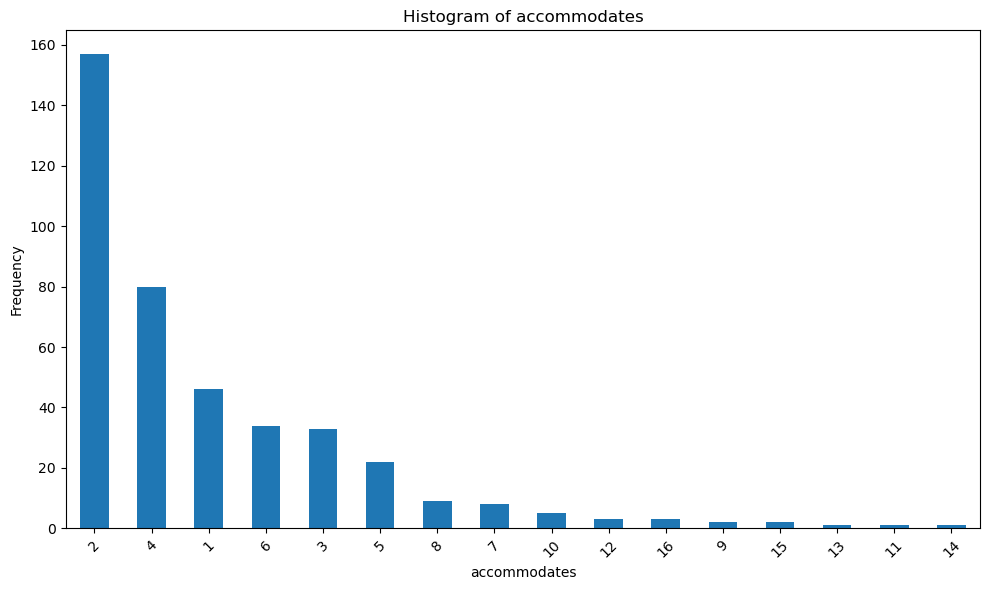

In [47]:
column_name = 'accommodates'

# Plot histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
listings_d[column_name].value_counts().plot(kind='bar')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

# this means the most rooms or renting places are for couples

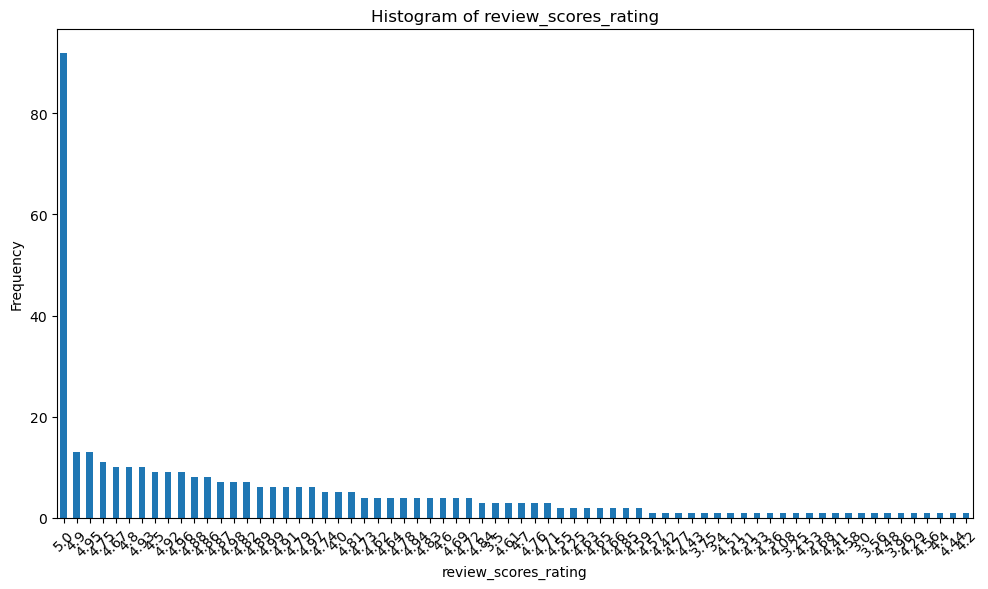

In [6]:
column_name = 'review_scores_rating'

# Plot histogram
plt.figure(figsize=(10, 6))  # Adjust the  figure size if needed
listings_d[column_name].value_counts().plot(kind='bar')
plt.title("Histogram of " + column_name)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#here this graph means the most reviews is high which is great for Airbnb it self
#and the lowest value is 4.2 but there's a specific review for every thing

In [17]:
#now we wanna have a look on the prices
print(listings_d["price"][0])
print(listings_d['price'].dtype)

#there's a problem its not just integets python consider it object we need to make it intergers

$50.00
object


In [18]:
#okay now this is an object data type we still cant anylsis
listings_d['price'] = listings_d['price'].astype(str) # let's convert it to string first
listings_d['price'] = listings_d['price'].fillna("$0.00") # aslo discovered there's an empty fields let's fill thim

# now the result look like "$50.00" we need to remove the special signs
listings_d['price'] = listings_d['price'].str.replace('$', '').str.replace('.', '').str.replace(',', '').astype(float)

In [19]:
#seems like there's extra `00` we 'll remove it by deviding by 100
listings_d["price"]

0       5000.0
1       7000.0
2      12500.0
3       6800.0
4      14000.0
        ...   
402    11700.0
403     5300.0
404     6000.0
405    11000.0
406     9800.0
Name: price, Length: 407, dtype: float64

In [20]:
listings_d["price"] = listings_d["price"]/100

In [21]:
listings_d["price"]
#now prices are perfect to anylsis

0       50.0
1       70.0
2      125.0
3       68.0
4      140.0
       ...  
402    117.0
403     53.0
404     60.0
405    110.0
406     98.0
Name: price, Length: 407, dtype: float64

<Axes: xlabel='price'>

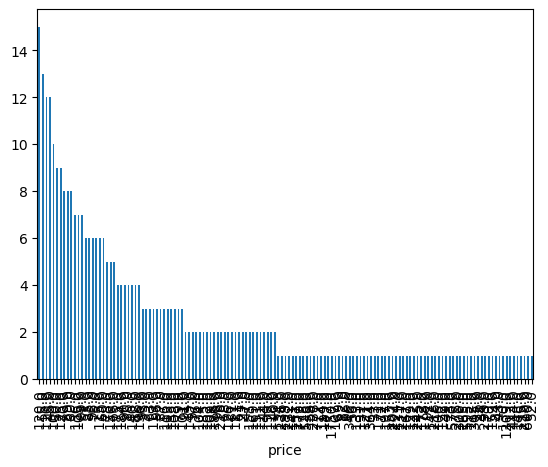

In [98]:
listings_d["price"].value_counts().plot(kind="bar")
# ooh the curve cause there's alot of prices I wont be able to see what is the most repeated price to start feeling what is the expensive
# places and the cheap ones

In [112]:
print(listings_d["price"].value_counts())
print("\nThe mean is :")
print(listings_d["price"].mean())
print("\nThe mean is :")
print(listings_d["price"].mode())
# greate now the most repeated price is 120
# now we can say that the prices is around 120 higher or lower
#let's see what is the heighst price and the lowest
print("\nThe maximum is :")
print(listings_d["price"].max())

print("\nThe minimum is :")
print(listings_d["price"].min())

# oh that's a huge difference

price
120.0    15
55.0     13
110.0    12
45.0     12
100.0    10
         ..
148.0     1
195.0     1
219.0     1
600.0     1
52.0      1
Name: count, Length: 139, dtype: int64

The mean is :
125.2032967032967

The mean is :
0    120.0
Name: price, dtype: float64

The maximum is :
1750.0

The minimum is :
26.0


<Axes: >

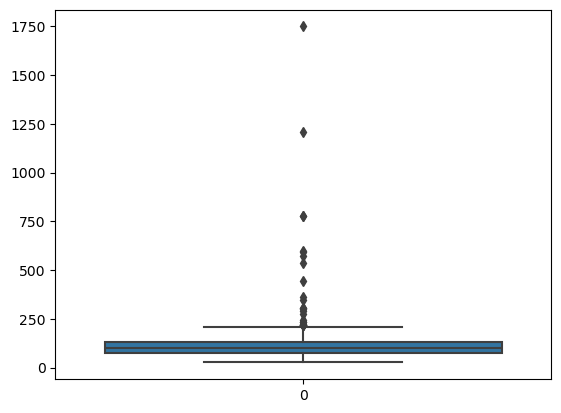

In [128]:
# we can also use the box chat 
sns.boxplot(listings_d["price"])
# the box chart is saying that the range of the 50% is very tight between 0 and 250

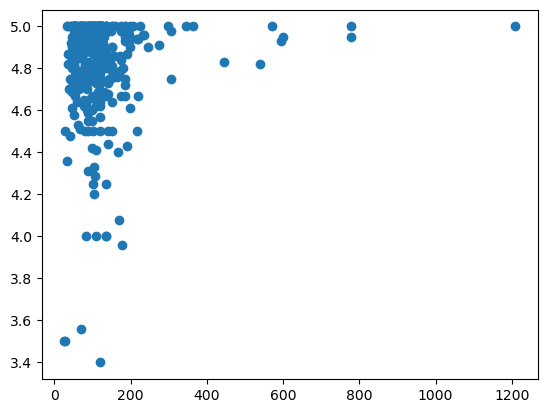

In [113]:
 #any way let's see the review according to the prices
plt.scatter(listings_d["price"],listings_d["review_scores_rating"])


In [22]:
# seems like the very high prices are so little and it's review is high but we can't judge acording to them
#I'll remove the far prices 
listing_remove_far_prices = listings_d
listing_remove_far_prices = listing_remove_far_prices[listing_remove_far_prices["price"]<200]
# great now we dont have the very far values

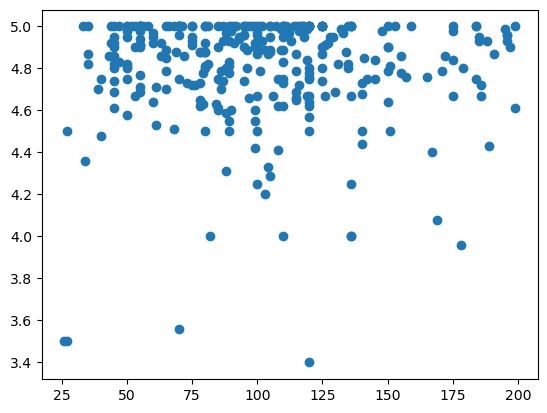

In [133]:
plt.scatter(listing_remove_far_prices["price"],listing_remove_far_proces["review_scores_rating"])
#okay seems like there's no obviese relation between the prices and the reviews

C:\Users\PC\AppData\Local\Temp\ipykernel_22328\2305879366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listing_remove_far_prices["price"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

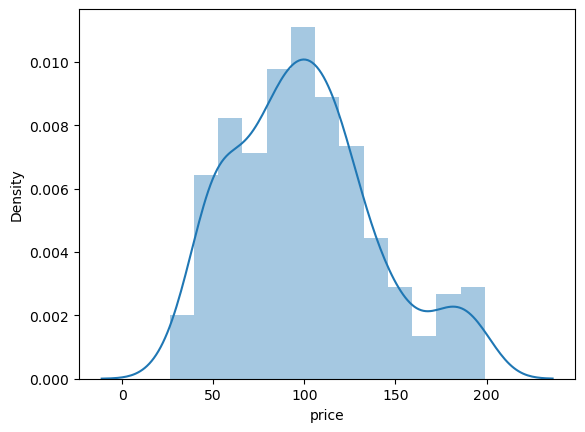

In [134]:
sns.distplot(listing_remove_far_prices["price"])
# the denisty is showing kind of normal distripution but no it's not
# but most of the prices are 100 higher or lower same what we discovered from the mean and mode

# okay I think we are done with the price we have a very good Idea about it and it's ranges now

In [4]:
#let's have a look on the availability to see how does it affect and how much we are capable to 
print(listings_d["has_availability"])
#seems like almost all the places are available right now
print(len(listings_d["has_availability"]))

NameError: name 'listings_d' is not defined

has_availability
t    335
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_20616\1512735713.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings_d["availability_30"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_20616\1512735713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

<Axes: xlabel='availability_90', ylabel='Density'>

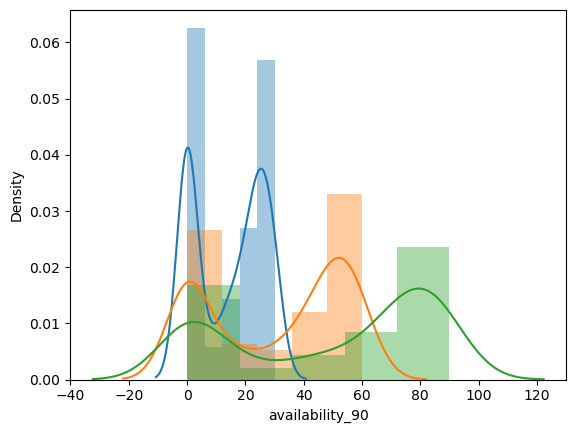

In [26]:

print(listing_remove_far_prices["has_availability"].value_counts())
sns.distplot(listings_d["availability_30"])
sns.distplot(listing_remove_far_prices["availability_60"])
sns.distplot(listing_remove_far_prices["availability_90"])
# seems from the density chart that most of the places aren't available in the next month at all 
# Also on the 2 and 3-month frame it just looks extended in more details go down

C:\Users\PC\AppData\Local\Temp\ipykernel_20616\1241547086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listing_remove_far_prices["availability_365"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Density'>

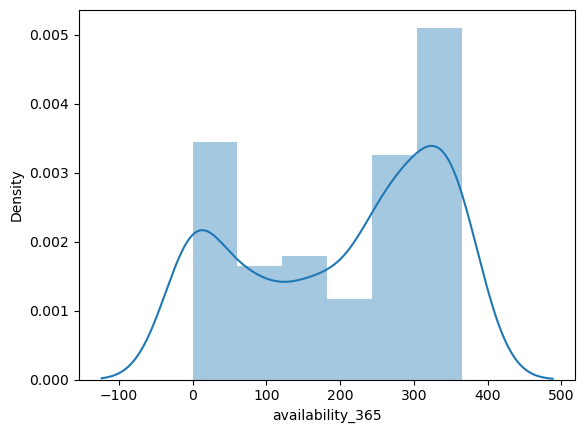

In [37]:
sns.distplot(listing_remove_far_prices["availability_365"])

In [33]:
print(listings_d["availability_30"].value_counts())# there's 140 place not available at all till next month almost 40%
print(listings_d["availability_60"].value_counts())# there's 115 place not available at all till next 2 months almost 30%
print(listings_d["availability_90"].value_counts())# there's 94 place not available at all till next 3 months almost 25%
print(listings_d["availability_365"].value_counts())# there's 76 place not available at all till next year wow

availability_30
0     140
30     39
25     31
26     19
24     19
28     16
21     12
23     12
22     12
18     12
19     11
15     11
14      8
29      8
12      7
20      7
27      7
4       5
10      5
13      4
8       4
3       3
16      3
2       2
1       2
17      2
6       2
9       2
7       1
5       1
Name: count, dtype: int64
availability_60
0     115
60     36
55     20
52     15
58     14
54     14
48     13
56     12
51     11
49     11
53      9
59      8
50      8
44      8
45      7
40      7
41      5
42      5
47      5
37      5
32      4
14      4
46      4
17      4
15      4
38      4
13      3
12      3
36      3
29      3
28      3
34      3
35      2
2       2
8       2
31      2
26      2
4       2
23      2
57      2
24      2
18      2
27      2
1       2
6       2
3       1
20      1
19      1
9       1
7       1
5       1
43      1
16      1
22      1
25      1
11      1
Name: count, dtype: int64
availability_90
0     94
90    30
81    16
78    12
82  

In [41]:
listings_d[listings_d["availability_365"] == 0].head(2) # Here I just tried to check if I understand this right
# All the places that are not available till next year aren't available till the next 3 months and 3 months till 2 months and so on

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100%,89%,f,https://a0.muscache.com/im/users/5294164/profi...,https://a0.muscache.com/im/users/5294164/profi...,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,42.66719,-73.81580,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",50.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91
4,6623339,https://www.airbnb.com/rooms/6623339,20240214034713,2024-02-14,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/c9f06fb9-88e0...,19648678,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,NaN,"I'm from Kansas City, MO. I've driven the enti...",within a day,90%,63%,f,https://a0.muscache.com/im/users/19648678/prof...,https://a0.muscache.com/im/users/19648678/prof...,Center Square & Hudson/Park,4,8,"['email', 'phone']",t,t,"Albany, New York, United States",SIXTH WARD,NaN,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hangers"", ""Hot water"", ""Bed linens"", ""Dishwa...",140.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,306,5,0,2015-06-07,2023-12-26,4.73,4.83,4.71,4.83,4.68,4.81,4.72,NaN,f,4,4,0,0,2.89


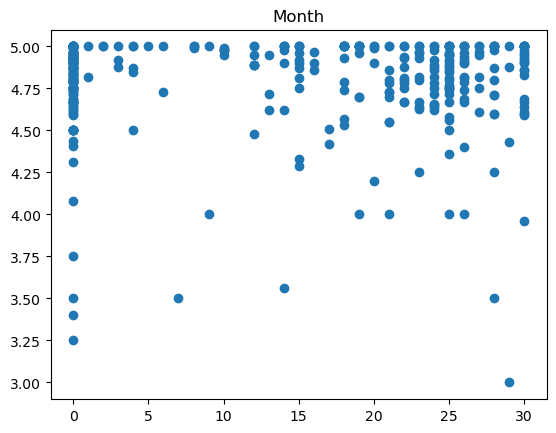

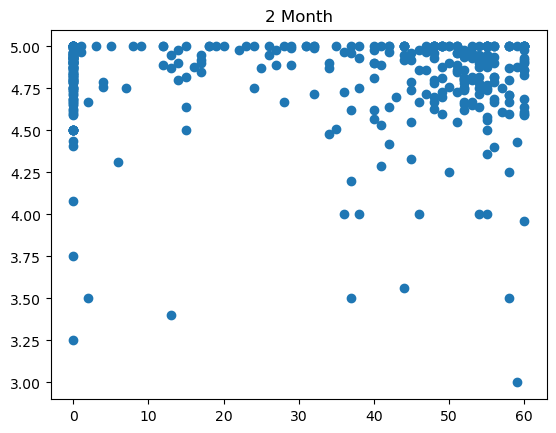

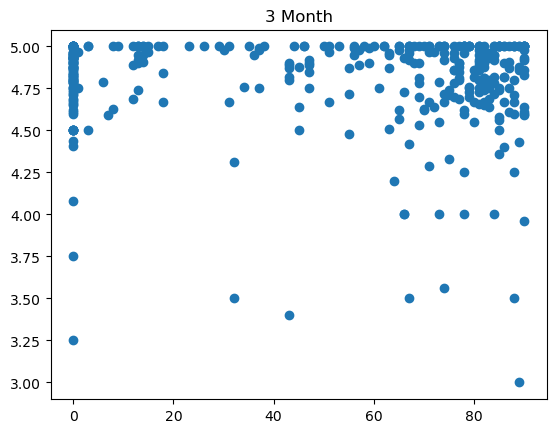

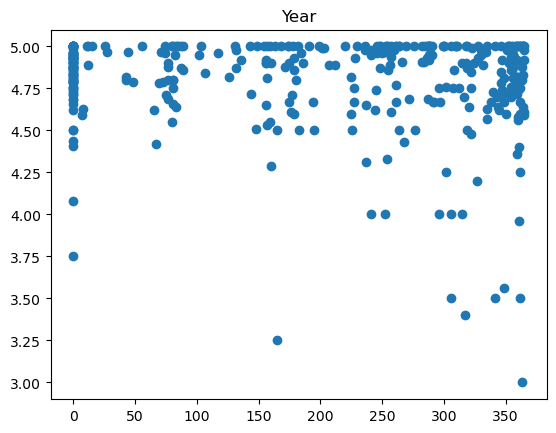

In [52]:
# Okay now let's try to see the relation between the Reviews and the availability
plt.scatter(listings_d["availability_30"],listings_d["review_scores_rating"])
plt.title("Month")
plt.show()
plt.scatter(listings_d["availability_60"],listings_d["review_scores_rating"])
plt.title("2 Month")
plt.show()
plt.scatter(listings_d["availability_90"],listings_d["review_scores_rating"])
plt.title("3 Month")
plt.show()
plt.scatter(listings_d["availability_365"],listings_d["review_scores_rating"])
plt.title("Year")
plt.show()

# generaly there's a concentration between the high rate place and unavailability on all the scales
# high rate means renting

In [60]:
# I wanna also make compare between the host_respose rate and the availability
#plt.scatter(listings_d["availability_30"],listings_d["host_response_rate"])
# okay theres a similar problem like the
print(listings_d["host_response_rate"].dtype)
listings_d["host_response_rate"].astype(str) # now it's string let's remove the `%`
listings_d["host_response_rate"] = listings_d["host_response_rate"].str[:-1] 

object


In [62]:
listings_d["host_response_rate"][0]# perfekt
# we just need to devide it by 100 for making it a ration number I feel it'll be better

'100'

In [65]:
listings_d['host_response_rate'] = listings_d['host_response_rate'].fillna(0)
listings_d["host_response_rate"].astype(int)/100

0      1.0
1      1.0
2      0.9
3      1.0
4      0.9
      ... 
402    1.0
403    1.0
404    1.0
405    1.0
406    1.0
Name: host_response_rate, Length: 407, dtype: float64

In [67]:
listings_d["host_response_rate"].astype(str)

0      100
1      100
2       90
3      100
4       90
      ... 
402    100
403    100
404    100
405    100
406    100
Name: host_response_rate, Length: 407, dtype: object

TypeError: 'value' must be an instance of str or bytes, not a int

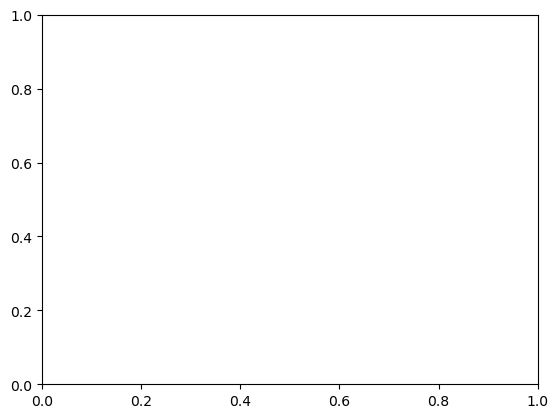

In [68]:
# all this handeling for host_response_rate now let's make the comparting
plt.scatter(listings_d["availability_30"],listings_d["host_response_rate"])

In [136]:
for i in listings_d.columns :
    print(i)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
re

In [29]:
#okay here I have an Idea I want to see some people's comments want to try to make some analysis throw
#I'll make a list of the positive and negative words
for i in reviews_d["comments"].tail(50):
    print(i,"\n")

In walking distance to everything downtown 

Clean and spacious place in a great location. 

Good for a short stay max 2 people. Apartment was very clean and I was left with drinks and snacks which was very nice. Fully stocked kitchen and bathroom. My only complaint would be that the hallway getting to the apartment smelled like heavy smoke from the other neighbors. Other than that host was very responsive and easy parking. 

Etem is a gracious host. He took care of our needs in a timely manner. Our questions were answered quickly due to his responsiveness. The apartment was exactly as described, very clean and everything in working order. It's simple yet comfortable and met my family's needs! Thank you Etem for a beautiful stay❤️ 

Would stay there again if I come back to Albany. 

the space was beautiful, very open, and roomy. And linda was wonderful as per usual. 

Brand new, super clean. Worked well for our family and two dogs. Street parking was easy to find. Entrance is actually 

In [ ]:
#great - hospitable - accommodating - welcoming - recommend - perfect - friendly - pleasant - grateful
#goods = ["great","hospitable","accommodating","welcoming","recommend","perfect",
#"Clean","awesome","friendly","pleasant","grateful","enjoyed","Wonderful","polite"]

positive_words = [
    'welcoming',
    'accommodating',
    'comfy',
    'restful',
    'pleasant',
    'perfect',
    'cozy',
    'personable',
    'friendly',
    'grateful',
    'clean',
    'warm',
    'helpful',
    'peaceful',
    'enjoyable',
    'delightful',
    'recommend',
    'nice',
    'quiet',
    'spacious',
    'responsive',
    'gracious',
    'beautiful',
    'flexible',
    'comfortable',
    'spotless',
    'convenient',
    'heartwarming',
    'fantastic',
    'adorable',
    'affordable',
    'tidy',
    'easy',
    'fantastic',
    'adoreable',
    'friendly',
    'fantastic',
    'adorable',
    'clean',
    'comfy',
    'fantastic',
    'convenient',
    'great'
]

negative_words = [
    'late arrival',
    'messy',
    'spread around',
    'felt on our own',
    'quite late arrival',
    'basement',
    'messy',
    'less privacy',
    'less tidy',
    'noise (for light sleepers)',
    'far (for transportation)',
    'problem (without a car)',
    'problem (with a car)',
    'heavy smoke smell',
    'unsafe area',
    'dirty floors',
    'stained carpet',
    'lack of towels',
    'light fixture malfunction',
    'noisy neighbors',
    'inadequate parking',
    'bad smell',
    'dirty coffee machine',
    'cheap towels',
    'uneven flooring',
    'malfunctioning shower head',
    'poor quality bedding',
    'unclean surroundings',
    'uncommunicative host'
]


In [ ]:
#lets try to add a new colum that 'll gudje according to the comment if it's positive or not
#reviews_d["positive"] = np.where(reviews_d["comments"])

In [32]:
calendar.head(20)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1489424,2024-02-14,t,$50.00,NaN,1,1125
1,1489424,2024-02-15,f,$50.00,NaN,1,1125
2,1489424,2024-02-16,f,$50.00,NaN,1,1125
3,1489424,2024-02-17,f,$50.00,NaN,1,1125
4,1489424,2024-02-18,t,$50.00,NaN,1,1125
5,1489424,2024-02-19,t,$50.00,NaN,1,1125
6,1489424,2024-02-20,f,$50.00,NaN,1,1125
7,1489424,2024-02-21,f,$50.00,NaN,1,1125
8,1489424,2024-02-22,f,$50.00,NaN,1,1125
9,1489424,2024-02-23,t,$50.00,NaN,1,1125


In [34]:
listings_d["neighborhood_overview"].value_counts()

neighborhood_overview
The Argus Hotel is located directly on Washington Park (Olmstead Design) is just a short walk to downtown, the Capitol Building and Empire State Plaza, Albany Medical Center, Albany Law School & Albany Pharmacy College, so leave your car for the day in our onsite parking lot. The hotel is only two blocks from hip Center Square, a neighborhood of 19th century brownstones, where you can stroll to numerous restaurants, galleries, pubs, and music venues.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [37]:
listings_d.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.070000e+02,4.070000e+02,4.070000e+02,407.000000,407.000000,0.0,407.000000,407.000000,407.000000,369.000000,...,361.000000,361.000000,361.000000,361.000000,0.0,407.000000,407.000000,407.000000,407.000000,360.000000
mean,5.043183e+17,2.024021e+13,2.252770e+08,22.174447,36.936118,NaN,42.657571,-73.776805,3.540541,1.253388,...,4.872188,4.873407,4.703657,4.752382,NaN,4.783784,3.422604,1.353808,0.007371,1.983972
std,4.242364e+17,0.000000e+00,1.804499e+08,137.017336,239.562750,NaN,0.009792,0.019578,2.573587,0.683776,...,0.224586,0.306562,0.352917,0.301258,NaN,4.772915,4.797709,2.604019,0.085643,1.989692
min,1.489424e+06,2.024021e+13,6.490680e+05,1.000000,1.000000,NaN,42.630660,-73.876489,1.000000,0.000000,...,3.000000,1.000000,3.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.050000
25%,4.734039e+07,2.024021e+13,4.762598e+07,2.000000,2.000000,NaN,42.652045,-73.790363,2.000000,1.000000,...,4.840000,4.860000,4.580000,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.520000
50%,6.686081e+17,2.024021e+13,1.886791e+08,4.000000,5.000000,NaN,42.657300,-73.773513,3.000000,1.000000,...,4.950000,4.960000,4.820000,4.820000,NaN,3.000000,1.000000,0.000000,0.000000,1.310000
75%,9.004550e+17,2.024021e+13,3.920749e+08,8.000000,13.000000,NaN,42.662410,-73.761990,4.000000,1.000000,...,5.000000,5.000000,4.950000,4.950000,NaN,6.000000,4.000000,2.000000,0.000000,2.722500
max,1.079743e+18,2.024021e+13,5.531120e+08,1173.000000,2084.000000,NaN,42.714896,-73.738103,16.000000,7.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,19.000000,19.000000,11.000000,1.000000,11.120000


In [1]:
listings_d.shape

NameError: name 'listings_d' is not defined

In [38]:
listings_d.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91
1,2992450,https://www.airbnb.com/rooms/2992450,20240214034713,2024-02-14,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240214034713,2024-02-14,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/678ed39b-74fd...,19648678,...,4.80,4.82,4.78,NaN,f,4,4,0,0,2.52
3,5651579,https://www.airbnb.com/rooms/5651579,20240214034713,2024-02-14,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.80,4.64,NaN,f,2,1,1,0,3.12
4,6623339,https://www.airbnb.com/rooms/6623339,20240214034713,2024-02-14,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/c9f06fb9-88e0...,19648678,...,4.68,4.81,4.72,NaN,f,4,4,0,0,2.89


In [ ]:
plt.plot(x_values, y_values, marker='o', linestyle='-')

AttributeError: 'numpy.float64' object has no attribute 'startswith'

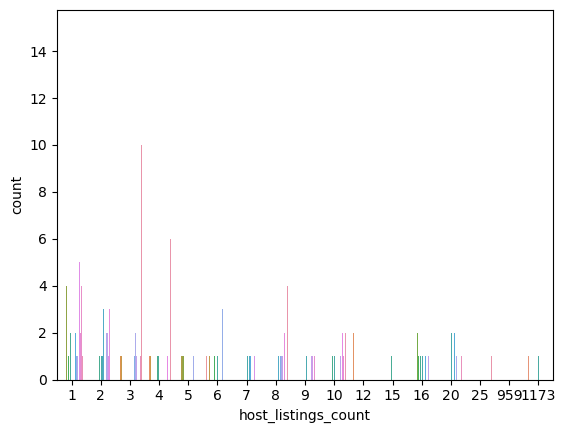

In [40]:
sns.countplot(x="host_listings_count",hue="review_scores_value",data=listings_d)

In [8]:
pd.set_option('display.max_rows', None)

In [5]:
nulls = listings_d.isna().sum()

In [12]:
sorted_nulls = nulls.sort_values(ascending=False)

In [13]:
sorted_nulls = sorted_nulls[sorted_nulls.values > 200].index

In [14]:
sorted_nulls

Index(['neighbourhood_group_cleansed', 'license', 'calendar_updated'], dtype='object')

In [17]:
listings_d.drop(sorted_nulls,axis=1,inplace= True)

In [18]:
null_values = listings_d.isna().sum()

In [21]:
null_values.sort_values(ascending=False)

host_about                                      195
neighborhood_overview                           160
neighbourhood                                   160
host_location                                    90
host_neighbourhood                               83
first_review                                     47
reviews_per_month                                47
last_review                                      47
review_scores_cleanliness                        46
review_scores_accuracy                           46
review_scores_rating                             46
review_scores_checkin                            46
review_scores_communication                      46
review_scores_location                           46
review_scores_value                              46
price                                            43
beds                                             38
bathrooms                                        38
host_response_time                               26
host_respons

In [22]:
null_values = null_values[null_values.values > 90].index

In [23]:
null_values

Index(['neighborhood_overview', 'host_about', 'neighbourhood'], dtype='object')

In [25]:
listings_d.drop(null_values,axis=1,inplace=True)

In [26]:
listings_d

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,...,4.92,4.92,4.82,4.81,f,1,0,1,0,1.91
1,2992450,https://www.airbnb.com/rooms/2992450,20240214034713,2024-02-14,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,https://a0.muscache.com/pictures/44627226/0e72...,4621559,https://www.airbnb.com/users/show/4621559,...,4.22,4.56,3.22,3.67,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240214034713,2024-02-14,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...",https://a0.muscache.com/pictures/678ed39b-74fd...,19648678,https://www.airbnb.com/users/show/19648678,...,4.86,4.80,4.82,4.78,f,4,4,0,0,2.52
3,5651579,https://www.airbnb.com/rooms/5651579,20240214034713,2024-02-14,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,https://www.airbnb.com/users/show/29288920,...,4.82,4.87,4.80,4.64,f,2,1,1,0,3.12
4,6623339,https://www.airbnb.com/rooms/6623339,20240214034713,2024-02-14,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,https://a0.muscache.com/pictures/c9f06fb9-88e0...,19648678,https://www.airbnb.com/users/show/19648678,...,4.83,4.68,4.81,4.72,f,4,4,0,0,2.89
5,7563949,https://www.airbnb.com/rooms/7563949,20240214034713,2024-02-14,city scrape,Rest or work in peace | Garden | Wifi | Kitchen,"This sunlit, street-facing one bedroom is a pe...",https://a0.muscache.com/pictures/53405335-edf0...,39656001,https://www.airbnb.com/users/show/39656001,...,4.69,4.81,4.42,4.53,f,6,3,3,0,0.40
6,8035768,https://www.airbnb.com/rooms/8035768,20240214034713,2024-02-14,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,https://www.airbnb.com/users/show/42430824,...,4.92,4.80,4.74,4.75,f,2,1,1,0,0.54
7,8035784,https://www.airbnb.com/rooms/8035784,20240214034713,2024-02-14,city scrape,Delightful French Victorian,Stunningly renovated French Victorian original...,https://a0.muscache.com/pictures/102414176/e6b...,42430824,https://www.airbnb.com/users/show/42430824,...,4.78,4.83,4.67,4.72,f,2,1,1,0,0.18
8,8915877,https://www.airbnb.com/rooms/8915877,20240214034713,2024-02-14,city scrape,"Charming 1BR State Capitol, downtwn","This is a cozy, well-appointed garden level ap...",https://a0.muscache.com/pictures/6684e943-01a0...,46312980,https://www.airbnb.com/users/show/46312980,...,4.93,4.90,4.80,4.80,f,1,1,0,0,2.23
9,9005989,https://www.airbnb.com/rooms/9005989,20240214034713,2024-02-14,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,https://a0.muscache.com/pictures/d242a77e-437c...,17766924,https://www.airbnb.com/users/show/17766924,...,4.95,4.92,4.87,4.78,f,1,1,0,0,6.30


In [38]:
listings_d.drop(["listing_url",
                 "source",
                 "picture_url",
                 "host_url",
                 "host_thumbnail_url",
                 "host_picture_url","latitude","longitude"],axis=1)[0:1]

,id,scrape_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,20240214034713,2024-02-14,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100%,89%,f,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",$50.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91


C:\Users\hemad\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


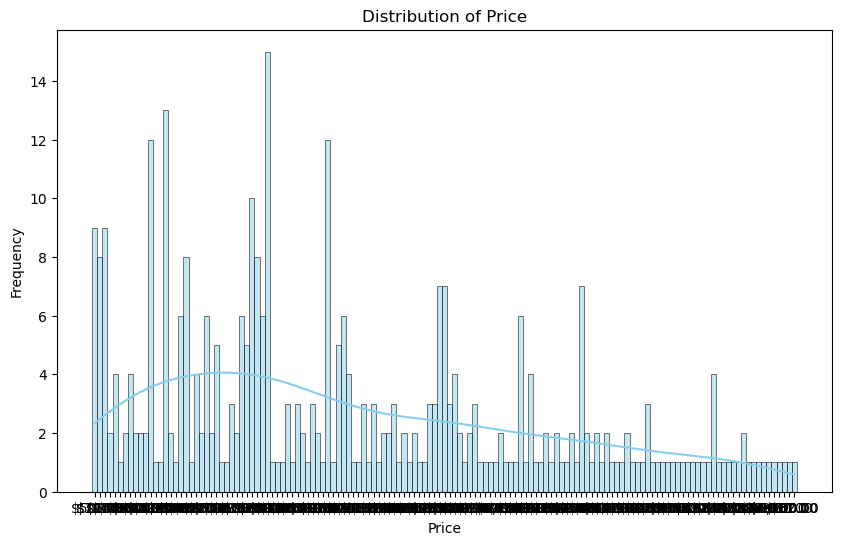

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_d['price'], kde=True, color='skyblue', bins=30) # Change bins as needed
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\hemad\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


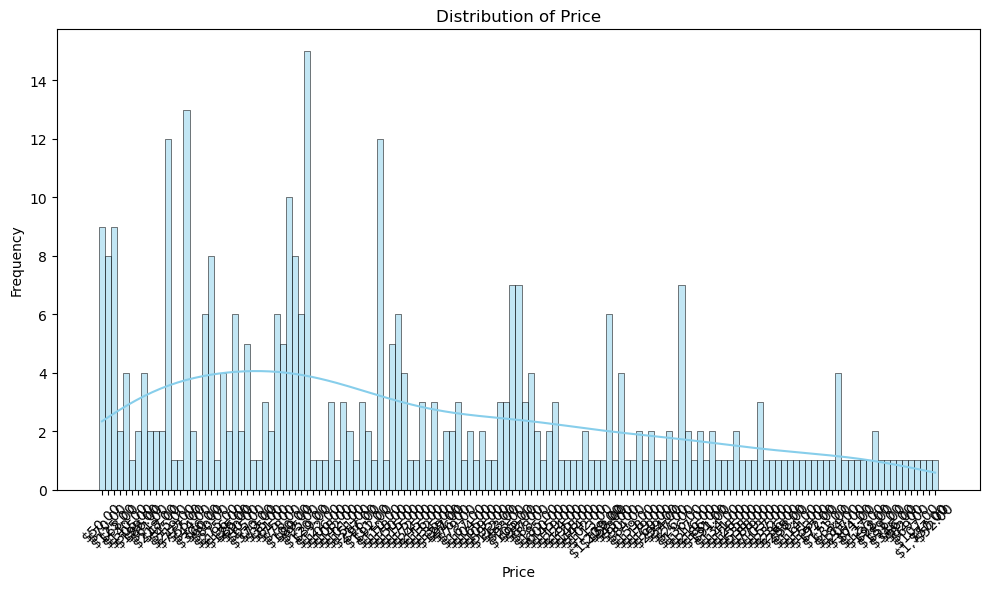

In [43]:
# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(listings_d['price'], kde=True, color='skyblue', bins=30) # Change bins as needed
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.xlabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
sns.countplot(x="Industry_aggregation_NZSIOC",hue="C.S Calls",data=data)

pd.crosstab(data["Year"],["Industry_aggregation_NZSIOC"])

data[["number of mints at night","C.S Calls"]].hist(figsize=(10,5))

data[["number of mints at night","C.S Calls"]].plot(kind="density",subplots=True,layout=(1,2))

sns.distplot(data[["number of mints at night","C.S Calls"]])

sns.boxplot(data["number of mints at night"])

sns.violinplot(data["number of mints at night"])

_,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x="Year",ax=axis[0],data=data)
sns.countplot(x="randoms",data=data,ax=axis[1])

import plotly.express as px
fig = px.pie(data,values="Year",names="Year")
fig.show()

# The Next Lecture
# this to see the correlation between the colums and each other
sns.heatmap(data.corr(),annot=True)

data_1 = data.iloc[:100, :]
plt.scatter(data_1["randoms"],data_1["Value"])
#42


